# Seaborn
As with most libraries, seaborn is a separate library. However, it is built on-top of many other libraries. It requires Pandas already, and a library called matplotlib.
We can just do `pip install seaborn` and pip will figure it out for us. Phew.

## Why do we care about visualisation?
When analysing data, it can be difficult to see the quality of our data from just numbers on a page. As humans, we are not biologically programmed to digest that format very well. However, we are great with visual cues and representations. Things that, at a glance, tell us lots of information about what its describing.

We can use visualisation and plotting of data to test hypothesise about relations between data. (More on this in fundamentals). And in a visual way get some intuition about the patterns within our data.

In [1]:
# Let's load some data that we want to use.
# Seaborn is built on Pandas data structures, so let's make a dataframe!

# Importing as standard.
import seaborn as sns
import pandas as pd

iris = pd.read_csv('./iris.csv')
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Univariate Plots
Univariate simply means one variable. It only concerns itself with how the values of a single data attribute (column) change, nothing else.

A form of univariate analysis you've done already with Pandas are statistical measures. But sometimes it's helpful to see these differences. I may have some numbers which represents the min and max, and mean; but without looking at the full range in a visual way I can't get an intuition for how my data looks.

### Plotting Univariate Histograms

We typically represent univariate plots by use of a histogram.

Seaborn has the function `displot` which can help us with this. Be careful, this function is very similar to `distplot`. `displot` is new as of version 0.11.0.

There are two ways we can use this:

1) We can call `sns.displot(some_dataframe, x='Some Column Name')`. Pass it a DataFrame, specify the column to use.

2) We can pass it the Data Series directly, instead of a DataFrame.

<u>Note:</u> Notice how for each of our plots, the axes range is set automatically, as well as the axes labels.

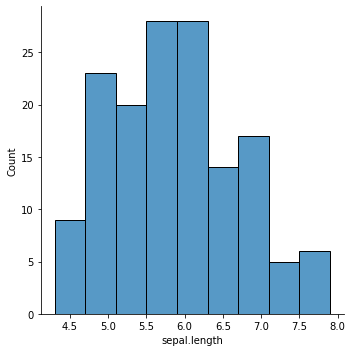

In [2]:
sns.displot(iris, x='sepal.length')

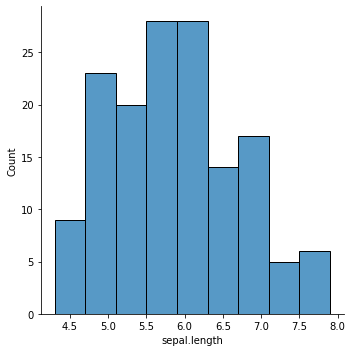

In [3]:
sns.displot(iris['sepal.length'])

### Specifying a bin size.
Currently we have a fixed number of bins. A fixed resolution if you will. What if we wanted a more narrow look. Maybe I want to compare those two peaks between 5.5 and 6.5 to see if they truly are equal, or if there's a narrower band which has the highest.

We can specify two parameters to this function `binwidth` and `bins`. `binwidth` specifically tells Seaborn what to set as the width of each of the bins. This is useful if you definitely know how wide you want your bars. Seaborn will then figure out the rest.
`bins` does the opposite. You specify a fixed number of bars, and then seaborn will calculate the size of each bin based upon the data provided.

```python
sns.displot(iris, x='sepal.length', bins=3)
sns.displot(iris, x='sepal.length', binwidth=0.5)
```

As before, this works whether you pass a DataFrame, accompanied by the column string to use. Or whether you pass it the Series object directly. Both will work.

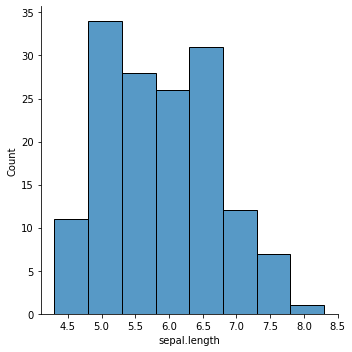

In [11]:

#sns.displot(iris, x='sepal.length', bins=12)
sns.displot(iris, x='sepal.length', binwidth=0.5)

# same as
#sns.displot(iris['sepal.length'], bins=3)
#sns.displot(iris['sepal.length'], binwidth=0.5)

## Conditioning.
Sometimes we want to see certain things overlapped.
Conditioning is where once we've looked at a certain variable, we might wish to see how this then appears when taking into account another variable.

In our example here, this looks like a normal distribution. But is this the same for all flower varieties?
In Seaborn, we can add colour to this plot, by use of the `hue=` parameter.

```python
sns.displot(data=iris, x='sepal.length', hue='variety')
```

In this case, we can't provide two disjointed Series, and we need to provide it the entire DataFrame to pull the appropriate columns.

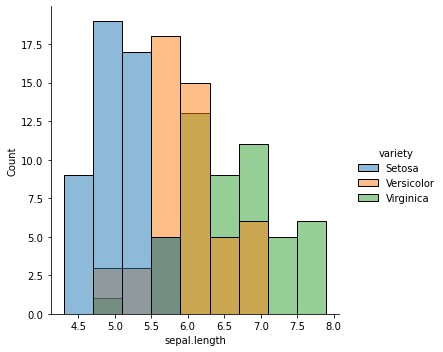

In [12]:
sns.displot(data=iris, x='sepal.length', hue='variety')

Now we have a better understanding! It looks like the setosa flower variety tend to have small sepal lengths, and the virginica is the longest. With Versicolor sitting inbetween.

Without conditioning, we wouldn't have seen this information, it was obscured (and all contributed to the same statistic: count).

## Multivariate plots

If univariate stands for a single variable. Multivariate stands for more than one. Typically this is 2 variables against each other (Remember independent vs dependent variables?), but we're not limited by just 2D necessarily, we can go to 3D plots on occasion.

### Scatter plot (sns.scatterplot)
If both your x, and your y axes are numeric and continous, it makes sense to use a scatterplot. This allows you to put an x for every x,y entry in your data.

Let's plot the Sepal Length against the Sepal Width

```python
sns.scatterplot(data=iris, x='sepal.length', y='sepal.width')
```

<AxesSubplot:xlabel='sepal.length', ylabel='sepal.width'>

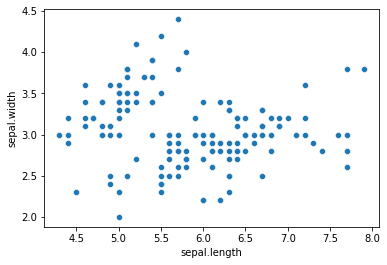

In [13]:
sns.scatterplot(data=iris, x='sepal.length', y='sepal.width')

This doesn't seem too useful. Maybe there's two groups here?
Let's condition this on the variety to get a better look

<AxesSubplot:xlabel='sepal.length', ylabel='sepal.width'>

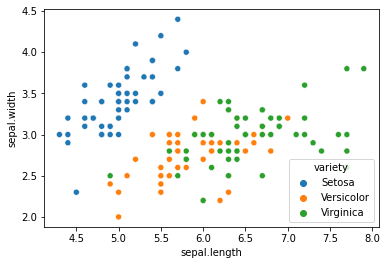

In [14]:
sns.scatterplot(data=iris, x='sepal.length', y='sepal.width', hue='variety')

Aha! Yes. Setosa is completely separate from the others. Then there's a mix of versicolor and virginica.
It would be nice to see the trend in the bottom left. If only we could filter out Setosa...

### Filtering of Pandas DataFrames.
With DataFrames we can also build really powerful expressions, similarly to how we filtered numpy arrays.
We can define a condition to hold true, and use that as the index instead!

```python
print( iris['variety'] != "Setosa" )
```

Should give us a True/False result of each record in the DataFrame. In essence, finding where variety isn't Setosa.
We can use this, and plug it into our plot to just focus on Versicolor and Virginica.

```python
# iris['variety'] != "Setosa" Is a data series. 

#Use whole expression as index.
iris[ iris['variety'] != "Setosa" ]

#or

indx = iris['variety'] != "Setosa"
iris[ indx ] # More readable? 
```


In [16]:
indx = iris['variety'] != "Setosa"
iris[ indx ] # More readable?

iris[ indx ]['variety'].unique() # Proven.

array(['Versicolor', 'Virginica'], dtype=object)

<AxesSubplot:xlabel='sepal.length', ylabel='sepal.width'>

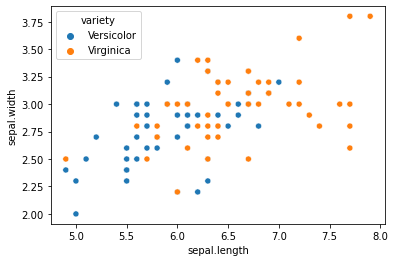

In [17]:
# Plugging it back in.
# Use data = iris[ indx ] Which is our trimmed down version.
# Missing rows where Variety = Setosa.
sns.scatterplot(data=iris[ indx ], x='sepal.length', y='sepal.width', hue='variety')

### lmplot - Lines of best fit.
We can improve on our plot by maybe looking at the correlation between the two chosen attributes.
This can be done for us by `lmplot`. Not only will it plot things nicely for us, but also calculate the line and plot it.

```python
sns.lmplot(data=some_data, x='A', y='B')
```

Likewise, any parameter available( https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot ) can be used here. Including `hue=`

E.g
```python
sns.lmplot(data=iris[ indx ], x='sepal.length', y='sepal.width')
```


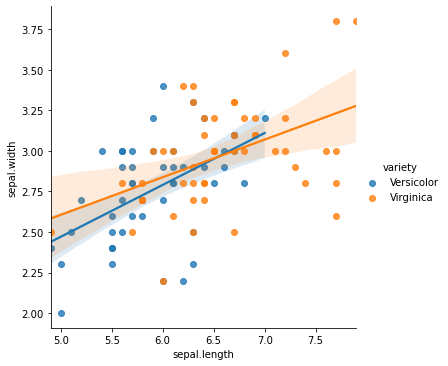

In [19]:
#sns.lmplot(data=iris[ indx ], x='sepal.length', y='sepal.width')

# Conditioned on Variety.
sns.lmplot(data=iris[ indx ], x='sepal.length', y='sepal.width', hue='variety')

# Saving figures.

We can easily generate our figures. But what if we wanted to save these somwhere for our boss to use later?

It turns out that everytime we call `sns.scatterplot`, or `sns.lmplot`, the return value is not `None`.

Let's see what we get...

```python
handle = sns.lmplot(data=iris[ indx ], x='sepal.length', x='sepal.width', hue='variety')
print( type(handle) )
```



<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'seaborn.axisgrid.FacetGrid'>
<class 'seaborn.axisgrid.FacetGrid'>


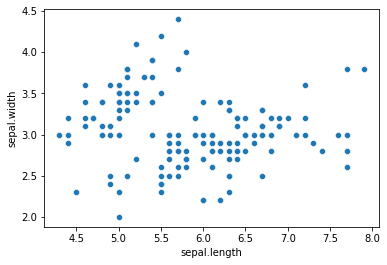

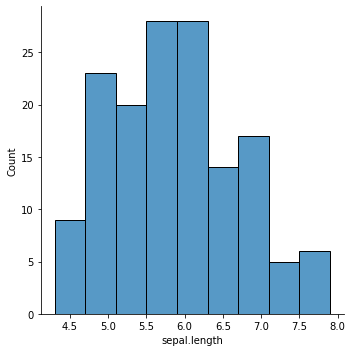

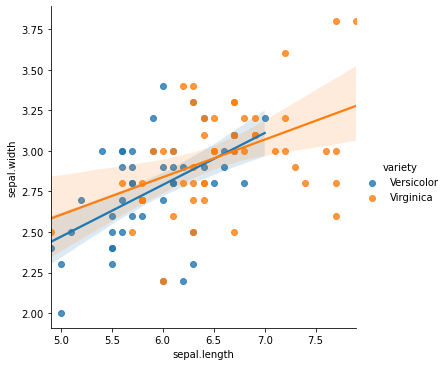

In [20]:
scatter_handle = sns.scatterplot(data=iris, x='sepal.length', y='sepal.width')
displot_handle = sns.displot(data=iris, x='sepal.length')
lm_handle = sns.lmplot(data=iris[ indx ], x='sepal.length', y='sepal.width', hue='variety')


print( type(scatter_handle) )
print( type(displot_handle) )
print( type(lm_handle) )

We get a `FacetGrid` for the `lmplot`, and `displot`. (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

We get an `AxesSubplot` for the `scatterplot` ( a basic plot ).

#### .savefig( filename )
We can save to a location by using `.savefig()` passing in an argument for the location we want to save the file to.

I specify the filetype as `.png` as this is a **lossless** image format, quality is important. Seaborn handles everything for us here.

```python
lm_handle.savefig('./lm_plot.png')
```

In [23]:
lm_handle.savefig('./lm_plot.png')
scatter_handle.savefig('./scatter_plot.png')
displot_handle.savefig('./dis_plot.png')

**Uh-oh**. AxesSubplot doens't have the function we want!

As AxesSubplot is rather primitive, we have to call `.get_figure()` on it to get the actual figure itself. Returning `<class 'matplotlib.figure.Figure'>`.

Then we can call `.savefig()` on it. Be cautious.


In [24]:
print( type( scatter_handle.get_figure() ) )
scatter_handle.get_figure().savefig('./scatter_plot.png')

# Few hoops to jump through.

<class 'matplotlib.figure.Figure'>
